In [62]:
from processor import Processor
from splitter import DataSplitter
from mlmodel import MLModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [63]:
# load the datas
Processor = Processor(filepath="../data/balanced_data.csv")
Processor.load_data()
Processor.show_features()

Dataset loaded successfully.
Features in the dataset:
1. Flow ID
2. SrcIP
3. DstIP
4. SrcPort
5. DstPort
6. Protocol
7. mTimestampStart
8. mTimestampLast
9. Flow Duration
10. Flow Bytes/s
11. Flow Packets/s
12. Tot Fwd Pkts
13. Tot Bwd Pkts
14. Total Length of Fwd Packet
15. Total Length of Bwd Packet
16. Fwd Packet Length Min
17. Fwd Packet Length Max
18. Fwd Packet Length Mean
19. Fwd Packet Length Std
20. Bwd Packet Length Min
21. Bwd Packet Length Max
22. Bwd Packet Length Mean
23. Bwd Packet Length Std
24. Flow IAT Mean
25. Flow IAT Min
26. Flow IAT Max
27. Flow IAT Stddev
28. Fwd IAT Min
29. Fwd IAT Max
30. Fwd IAT Mean
31. Fwd IAT Std
32. Fwd IAT Tot
33. Bwd IAT Min
34. Bwd IAT Max
35. Bwd IAT Mean
36. Bwd IAT Std
37. Bwd IAT Tot
38. Fwd PSH flags
39. Bwd PSH flags
40. Fwd URG flags
41. Bwd URG flags
42. Fwd Header Length
43. Bwd Header Length
44. Fwd Packets/s
45. Bwd Packets/s
46. Packet Length Min
47. Packet Length Max
48. Packet Length Mean
49. Packet Length Std
50. Packet L

In [64]:
# columns to drop

columns_to_drop = ['Flow ID', 'SrcIP', 'DstIP', 'External_src', 'External_dst', 'Conn_state', 'Segment_src','Segment_dst','Expoid_src', 'Expoid_dst', 'mTimestampStart', 'mTimestampLast','SrcPort']


In [44]:
Processor.drop_features(columns_to_drop = columns_to_drop)
Processor.show_features()

Successfully dropped the following columns: SrcIP, Segment_src, DstIP, SrcPort, External_dst, mTimestampLast, mTimestampStart, Flow ID, Expoid_src, External_src, Conn_state, Segment_dst, Expoid_dst
Features in the dataset:
1. DstPort
2. Protocol
3. Flow Duration
4. Flow Bytes/s
5. Flow Packets/s
6. Tot Fwd Pkts
7. Tot Bwd Pkts
8. Total Length of Fwd Packet
9. Total Length of Bwd Packet
10. Fwd Packet Length Min
11. Fwd Packet Length Max
12. Fwd Packet Length Mean
13. Fwd Packet Length Std
14. Bwd Packet Length Min
15. Bwd Packet Length Max
16. Bwd Packet Length Mean
17. Bwd Packet Length Std
18. Flow IAT Mean
19. Flow IAT Min
20. Flow IAT Max
21. Flow IAT Stddev
22. Fwd IAT Min
23. Fwd IAT Max
24. Fwd IAT Mean
25. Fwd IAT Std
26. Fwd IAT Tot
27. Bwd IAT Min
28. Bwd IAT Max
29. Bwd IAT Mean
30. Bwd IAT Std
31. Bwd IAT Tot
32. Fwd PSH flags
33. Bwd PSH flags
34. Fwd URG flags
35. Bwd URG flags
36. Fwd Header Length
37. Bwd Header Length
38. Fwd Packets/s
39. Bwd Packets/s
40. Packet Leng

In [45]:
# extract the target
Processor.extract_target(target_column='Label')
print(Processor.y.value_counts())
Processor.show_features()

Target column 'Label' extracted successfully and stored in self.y.
Label
1    1644599
0    1644599
Name: count, dtype: int64
Features in the dataset:
1. DstPort
2. Protocol
3. Flow Duration
4. Flow Bytes/s
5. Flow Packets/s
6. Tot Fwd Pkts
7. Tot Bwd Pkts
8. Total Length of Fwd Packet
9. Total Length of Bwd Packet
10. Fwd Packet Length Min
11. Fwd Packet Length Max
12. Fwd Packet Length Mean
13. Fwd Packet Length Std
14. Bwd Packet Length Min
15. Bwd Packet Length Max
16. Bwd Packet Length Mean
17. Bwd Packet Length Std
18. Flow IAT Mean
19. Flow IAT Min
20. Flow IAT Max
21. Flow IAT Stddev
22. Fwd IAT Min
23. Fwd IAT Max
24. Fwd IAT Mean
25. Fwd IAT Std
26. Fwd IAT Tot
27. Bwd IAT Min
28. Bwd IAT Max
29. Bwd IAT Mean
30. Bwd IAT Std
31. Bwd IAT Tot
32. Fwd PSH flags
33. Bwd PSH flags
34. Fwd URG flags
35. Bwd URG flags
36. Fwd Header Length
37. Bwd Header Length
38. Fwd Packets/s
39. Bwd Packets/s
40. Packet Length Min
41. Packet Length Max
42. Packet Length Mean
43. Packet Length Std

In [46]:
# solve and encode categorical datas
Processor.detect_categorical(handle_nan="drop")
Processor.encode_categorical(method="label")

Categorical Features and their NaN Information:
- Service:
  NaN Count: 1384681
  Percentage of NaNs: 42.10%
  Action: Dropped rows with NaN in 'Service'.

Categorical NaN handling completed.
Encoding categorical features using label encoding.
Feature 'Service' encoded using Label Encoding.
Categorical encoding completed.


In [47]:
# drop duplicated lines in the code
Processor.handle_duplicates()
print(Processor.y.value_counts())

Found 159712 duplicate rows in the dataset.
Duplicate rows have been removed.
Label
0    882855
1    861950
Name: count, dtype: int64


In [48]:
# detect numerical issues and treat the datas and drop them
num_issue_features = Processor.detect_missing_numerical()
Processor.handle_missing_values(num_issue_features, method="drop", custom_value=None)
print(Processor.y.value_counts())

Missing values for numerical features:
- Flow Bytes/s:
  NaN Count: 1 (0.00%)
  Inf Count: 331 (0.02%)
- Flow Packets/s:
  NaN Count: 0 (0.00%)
  Inf Count: 332 (0.02%)
- Flow IAT Mean:
  NaN Count: 150 (0.01%)
  Inf Count: 0 (0.00%)
- Flow IAT Min:
  NaN Count: 150 (0.01%)
  Inf Count: 0 (0.00%)
- Flow IAT Max:
  NaN Count: 150 (0.01%)
  Inf Count: 0 (0.00%)
- Flow IAT Stddev:
  NaN Count: 150 (0.01%)
  Inf Count: 0 (0.00%)
Dropping rows with missing values in 'Flow Bytes/s'.
Dropping rows with missing values in 'Flow Packets/s'.
Dropping rows with missing values in 'Flow IAT Mean'.
Dropping rows with missing values in 'Flow IAT Min'.
Dropping rows with missing values in 'Flow IAT Max'.
Dropping rows with missing values in 'Flow IAT Stddev'.
Missing value handling completed.
Label
0    882527
1    861946
Name: count, dtype: int64


In [49]:
Processor.show_features()

Features in the dataset:
1. DstPort
2. Protocol
3. Flow Duration
4. Flow Bytes/s
5. Flow Packets/s
6. Tot Fwd Pkts
7. Tot Bwd Pkts
8. Total Length of Fwd Packet
9. Total Length of Bwd Packet
10. Fwd Packet Length Min
11. Fwd Packet Length Max
12. Fwd Packet Length Mean
13. Fwd Packet Length Std
14. Bwd Packet Length Min
15. Bwd Packet Length Max
16. Bwd Packet Length Mean
17. Bwd Packet Length Std
18. Flow IAT Mean
19. Flow IAT Min
20. Flow IAT Max
21. Flow IAT Stddev
22. Fwd IAT Min
23. Fwd IAT Max
24. Fwd IAT Mean
25. Fwd IAT Std
26. Fwd IAT Tot
27. Bwd IAT Min
28. Bwd IAT Max
29. Bwd IAT Mean
30. Bwd IAT Std
31. Bwd IAT Tot
32. Fwd PSH flags
33. Bwd PSH flags
34. Fwd URG flags
35. Bwd URG flags
36. Fwd Header Length
37. Bwd Header Length
38. Fwd Packets/s
39. Bwd Packets/s
40. Packet Length Min
41. Packet Length Max
42. Packet Length Mean
43. Packet Length Std
44. Packet Length Variance
45. FIN Flag Cnt
46. SYN Flag Cnt
47. RST Flag Cnt
48. PSH Flag Cnt
49. ACK Flag Cnt
50. URG Flag

In [50]:
Processor.rescale_data(method="standardize")

Applying standardization (mean=0, std=1).
Rescaling completed using standardize.


In [51]:
Processor.show_features()

Features in the dataset:
1. DstPort
2. Protocol
3. Flow Duration
4. Flow Bytes/s
5. Flow Packets/s
6. Tot Fwd Pkts
7. Tot Bwd Pkts
8. Total Length of Fwd Packet
9. Total Length of Bwd Packet
10. Fwd Packet Length Min
11. Fwd Packet Length Max
12. Fwd Packet Length Mean
13. Fwd Packet Length Std
14. Bwd Packet Length Min
15. Bwd Packet Length Max
16. Bwd Packet Length Mean
17. Bwd Packet Length Std
18. Flow IAT Mean
19. Flow IAT Min
20. Flow IAT Max
21. Flow IAT Stddev
22. Fwd IAT Min
23. Fwd IAT Max
24. Fwd IAT Mean
25. Fwd IAT Std
26. Fwd IAT Tot
27. Bwd IAT Min
28. Bwd IAT Max
29. Bwd IAT Mean
30. Bwd IAT Std
31. Bwd IAT Tot
32. Fwd PSH flags
33. Bwd PSH flags
34. Fwd URG flags
35. Bwd URG flags
36. Fwd Header Length
37. Bwd Header Length
38. Fwd Packets/s
39. Bwd Packets/s
40. Packet Length Min
41. Packet Length Max
42. Packet Length Mean
43. Packet Length Std
44. Packet Length Variance
45. FIN Flag Cnt
46. SYN Flag Cnt
47. RST Flag Cnt
48. PSH Flag Cnt
49. ACK Flag Cnt
50. URG Flag

In [52]:
    # Initialize DataSplitter
splitter = DataSplitter()
splitter.set_data(Processor.data, Processor.y)
splitter.random_split(test_size=0.2)

Data set successfully:
- Features: (1744473, 81)
- Target: (1744473,)
Random split completed:
- Train: 1395578
- Test: 348895


In [53]:
X_train, y_train = splitter.splits["train"]
X_test, y_test = splitter.splits["test"]

In [54]:
print(X_train.shape)
print(y_train.shape)


(1395578, 81)
(1395578,)


## Importance Analysis

In [55]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


In [56]:


model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


                  Feature  Importance
66     FWD Init Win Bytes    0.133152
12  Fwd Packet Length Std    0.089626
10  Fwd Packet Length Max    0.083194
47           PSH Flag Cnt    0.078602
44           FIN Flag Cnt    0.062954
..                    ...         ...
34          Bwd URG flags    0.000000
32          Bwd PSH flags    0.000000
58      Fwd Bulk Rate Avg    0.000000
57    Fwd Packet/Bulk Avg    0.000000
49           URG Flag Cnt    0.000000

[81 rows x 2 columns]


## Permutation Importance

In [57]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
print(X_test.columns[sorted_idx])
# the print of this cell show the features in order of their impact on the model performance


Index(['Packet Length Max', 'Flow IAT Mean', 'Fwd IAT Tot',
       'Fwd Segment Size Avg', 'Flow Packets/s', 'Fwd IAT Mean',
       'Bwd Packet Length Max', 'Flow Duration', 'Average Packet Size',
       'Bwd IAT Mean', 'Subflow Fwd Packets', 'Bwd Bytes/Bulk Avg',
       'Packet Length Variance', 'Fwd PSH flags', 'Fwd IAT Std', 'Bwd IAT Min',
       'PSH Flag Cnt', 'Flow Bytes/s', 'Fwd Packet Length Max',
       'Flow IAT Stddev', 'Bwd Segment Size Avg', 'Fwd IAT Min',
       'Flow IAT Min', 'Fwd Packet Length Min', 'Fwd Packets/s',
       'Bwd Packets/s', 'ACK Flag Cnt', 'ECE Flag Cnt', 'SYN Flag Cnt',
       'Subflow Fwd Bytes', 'CWR Flag Cnt', 'Subflow Bwd Bytes',
       'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Active Min',
       'Fwd Bulk Rate Avg', 'Active Mean', 'URG Flag Cnt', 'Bwd PSH flags',
       'Active Std', 'Idle Std', 'Bwd URG flags', 'Fwd URG flags', 'Idle Max',
       'Idle Mean', 'Idle Min', 'Active Max', 'Tot Fwd Pkts', 'Bwd IAT Tot',
       'Packet Length Std'

In [58]:
# since we have the features with their importances / let's focus on the first 5 features :
# 'Flow Duration', 'Bwd Packets/s', 'Flow Packets/s', 'Fwd Packets/s', 'Fwd Segment Size Avg', 'Packet Length Mean', 'Packet Length Max'
# we need to make sure that these features are not derived from the target
# I would like now to be able to study the correlation between the top features and the target


In [59]:
# I need to check for multicolinearity
# Compute correlation matrix
correlation_matrix = X_train.corr()

# Highlight features with high correlation
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
corr_list = high_corr_pairs[(high_corr_pairs > 0.99) & (high_corr_pairs < 1)]
print(corr_list)


Fwd Segment Size Avg    Fwd Packet Length Mean    1.000000
Fwd Packet Length Mean  Fwd Segment Size Avg      1.000000
Flow Duration           Fwd IAT Tot               0.999569
Fwd IAT Tot             Flow Duration             0.999569
CWR Flag Cnt            ECE Flag Cnt              0.999543
ECE Flag Cnt            CWR Flag Cnt              0.999543
Idle Min                Idle Mean                 0.995827
Idle Mean               Idle Min                  0.995827
                        Idle Max                  0.995802
Idle Max                Idle Mean                 0.995802
Flow IAT Max            Idle Max                  0.995573
Idle Max                Flow IAT Max              0.995573
Flow IAT Max            Fwd IAT Max               0.992883
Fwd IAT Max             Flow IAT Max              0.992883
Packet Length Max       Bwd Packet Length Max     0.991630
Bwd Packet Length Max   Packet Length Max         0.991630
Flow IAT Max            Idle Mean                 0.9914

In [60]:
redundant_features = [
    'Fwd Packet Length Mean', 'Fwd IAT Tot', 'ECE Flag Cnt', 'Idle Min',
    'Idle Max', 'Fwd IAT Max', 'Packet Length Max', 'SYN Flag Cnt'
]



In [26]:
X_train_reduced = X_train.drop(columns=redundant_features)
X_test_reduced = X_test.drop(columns=redundant_features)

In [27]:
model = RandomForestClassifier()
model.fit(X_train_reduced, y_train)


RandomForestClassifier()

In [28]:
model.score(X_test_reduced, y_test)

0.9998306228280907

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [31]:
y_score = model.predict_proba(X_test_reduced)[:, 1]

In [32]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

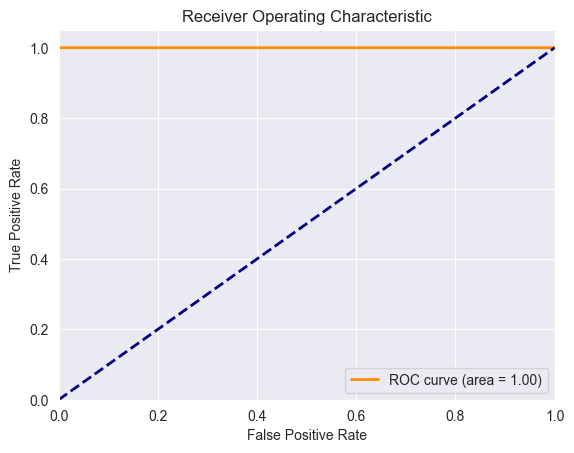

In [33]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(X_test_reduced)))


[[181791      1]
 [    59 172388]]


In [35]:
print("Class distribution in training set:", np.bincount(y_train))
print("Class distribution in test set:", np.bincount(y_test))

Class distribution in training set: [727456 689499]
Class distribution in test set: [181792 172447]


In [36]:
splitter.check_data_leakage(X_train_reduced, X_test_reduced)

{'overlap_in_features': 0}

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_reduced, y_train, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", np.mean(scores))

Cross-validated AUC scores: [0.99999616 0.99999986 0.99999991 0.99999978 0.9999998 ]
Mean AUC: 0.99999910368773


In [61]:
X_train_reduced.columns

Index(['SrcPort', 'DstPort', 'Protocol', 'Flow Duration', 'Flow Bytes/s',
       'Flow Packets/s', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Min', 'Fwd Packet Length Max',
       'Fwd Packet Length Std', 'Bwd Packet Length Min',
       'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Min',
       'Flow IAT Max', 'Flow IAT Stddev', 'Fwd IAT Min', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Bwd IAT Min', 'Bwd IAT Max', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Tot', 'Fwd PSH flags', 'Bwd PSH flags',
       'Fwd URG flags', 'Bwd URG flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWR Flag Cnt',
       'Down/Up Ratio'